# pybalmorel for Post-Processing
This notebook provide examples on how to use pybalmorel for pre-processing, post-processing and for executing Balmorel scenarios. Check the following pages:
- [Home](../README.md)
- [Pre-Processing](PreProcessing.ipynb)
- [Execution](Execution.ipynb)

In [7]:
### 0.1 Use development scripts or the package installed from pip
use_development = True
if use_development:
    import sys
    import os
    # Adjust the sys.path to include the project root directory
    project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    from src.pybalmorel import MainResults
    from src.pybalmorel.utils import symbol_to_df
else:
    from pybalmorel import MainResults
    from pybalmorel.utils import symbol_to_df

## Working with Outputs

This section presents examples of how to work with the outputs from Balmorel

### MainResults

The main output from Balmorel is MainResults.gdx, which may be loaded from one path (demanding different filenames, e.g., MainResults_SC1.gdx, MainResults_SC2.gdx, etc.) or several paths (which by default gives scenario names of SC1, SC2, ..., SCN format if no list of scenario_names are provided)

In [8]:
### 1.1.1 Loading one scenario
res = MainResults(files=['MainResults_base.gdx','MainResults_STO_heat.gdx','MainResults_STO_new.gdx','MainResults_STO_new_bis.gdx'], paths='files', scenario_names=['BASE','STO_HEAT','STO_NEW','STO_NEW_BIS'])

c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_base.gdx
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_STO_heat.gdx
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_STO_new.gdx
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_STO_new_bis.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\classes.py:103: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = gams.GamsWorkspace()


In [ ]:
### 1.1.3 Plotting bar charts with an interactive gui
res.interactive_bar_chart()

Result type: balmorel


GridBox(children=(Dropdown(description='Table:', layout=Layout(width='80%'), options=('F_CONS_YCRA', 'F_CONS_Y…

Output()

Stack(children=(GridBox(children=(SelectMultiple(description='Scenario', index=(0,), layout=Layout(height='99%…

Output()

Output()

HBox()

Output()

Output()

Output()

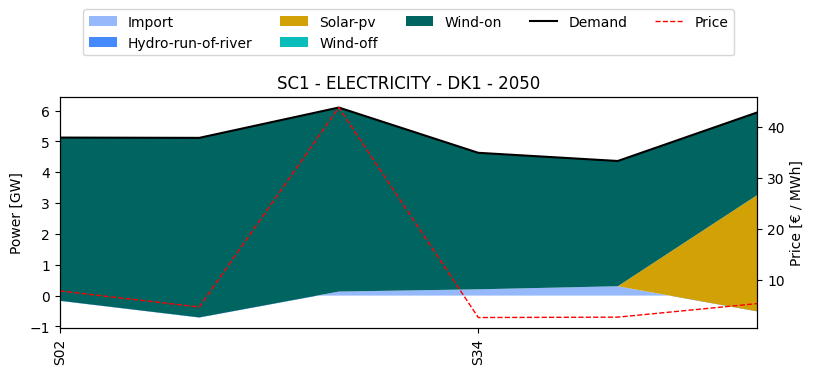

In [4]:
### 1.1.4 Plotting production profiles
fig, ax = res.plot_profile(scenario='SC1', year=2050, commodity='Electricity', columns='Technology', region='DK1')


Found MainResults in files\MainResults.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:432: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:432: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:432: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:819: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

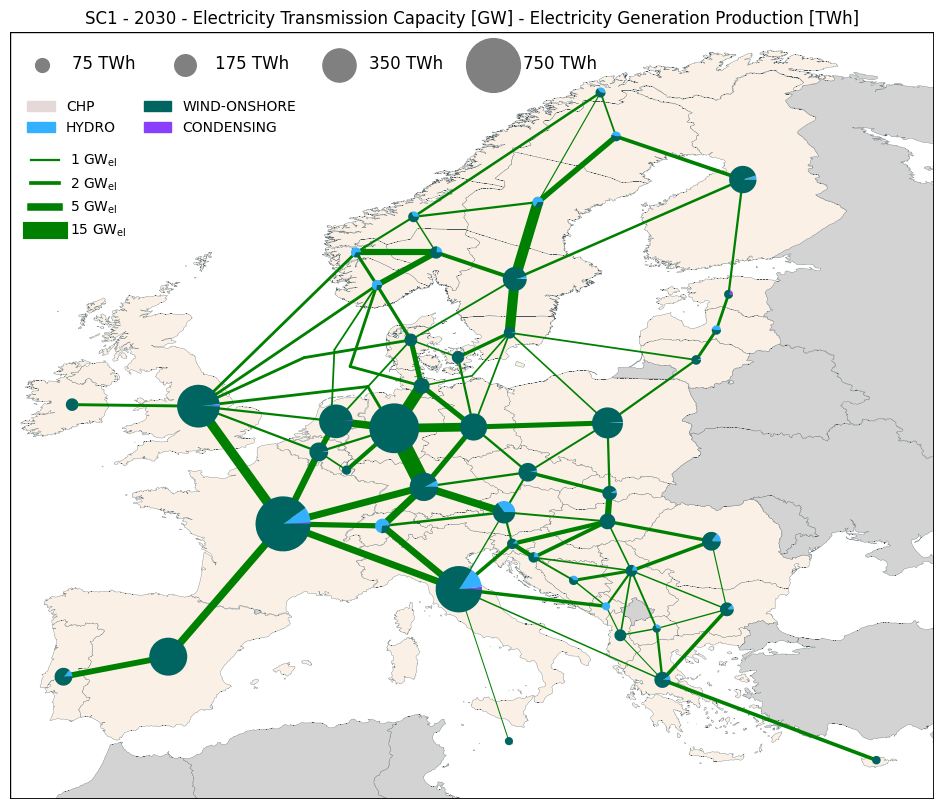

In [5]:
### 1.1.5 Plotting map of transmission capacity
fig, ax = res.plot_map(scenario='SC1', year=2030, commodity='Electricity', lines='Capacity', generation='Production')

### Other General Functions

In [ ]:
### Using symbol_to_df
import gams
import os
ws = gams.GamsWorkspace()
db = ws.add_database_from_gdx(os.path.abspath('files/MainResults_Example1.gdx'))

fuel = symbol_to_df(db, 'F_CONS_YCRA')
fuel        

C:\Users\s233235\AppData\Local\Temp\ipykernel_26048\761078643.py:4: UserWarning: The GAMS version (47.6.0) differs from the API version (48.4.0).
  ws = gams.GamsWorkspace()


,Year,Country,Region,Area,Generation,Fuel,Technology,Unit,Value
0,2030,DENMARK,DK1,DK1_Large,GNR_BO_MSW_E-106_LS-35-MW-FEED_Y-2030,MUNIWASTE,BOILERS,TWh,-8.299139e-17
1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-36,BIOGAS,CHP-BACK-PRESSURE,TWh,1.611000e-03
2,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-39,BIOGAS,CHP-BACK-PRESSURE,TWh,4.791692e-03
3,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-40,BIOGAS,CHP-BACK-PRESSURE,TWh,6.390300e-04
4,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-41,BIOGAS,CHP-BACK-PRESSURE,TWh,2.584585e-03
...,...,...,...,...,...,...,...,...,...
186,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG1,GNR_WT-SP277-HH100_ONS_LS_L-RG1_Y-2030,WIND,WIND-ON,TWh,7.214518e-01
187,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2030,WIND,WIND-ON,TWh,2.082185e+00
188,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2050,WIND,WIND-ON,TWh,5.335354e-01
189,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG3,GNR_WT-SP277-HH100_ONS_LS_L-RG3_Y-2030,WIND,WIND-ON,TWh,2.618147e+00
